In [187]:
# Add Matplotlib inline magic command
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
file_dir='C://Users/Ian/Desktop/Misc_Projects/World_Cup_Analysis/Data'

matches = pd.read_csv(f'{file_dir}/import_matches_transformed.csv')
players = pd.read_csv(f'{file_dir}/WorldCupPlayers.csv')


pd.options.display.float_format = '{:.2f}'.format

In [3]:
matches.head(50)

,match_date,year,country,city,stadium,attendance,stage,home_name,home_init,away_name,away_init,home_score_45,away_score_45,home_score_final,away_score_final,winner,matchID,roundID
0,1930-07-13,1930,Uruguay,Montevideo,Pocitos,4444.00,Group 1,France,FRA,Mexico,MEX,3,0,4,1,France,1096,201
1,1930-07-13,1930,Uruguay,Montevideo,Parque Central,18346.00,Group 4,United States,USA,Belgium,BEL,2,0,3,0,United States,1090,201
2,1930-07-14,1930,Uruguay,Montevideo,Parque Central,24059.00,Group 2,Yugoslavia,YUG,Brazil,BRA,2,0,2,1,FR Yugoslavia,1093,201
3,1930-07-14,1930,Uruguay,Montevideo,Pocitos,2549.00,Group 3,Romania,ROU,Peru,PER,1,0,3,1,Romania,1098,201
4,1930-07-15,1930,Uruguay,Montevideo,Parque Central,23409.00,Group 1,Argentina,ARG,France,FRA,0,0,1,0,Argentina,1085,201
5,1930-07-16,1930,Uruguay,Montevideo,Parque Central,9249.00,Group 1,Chile,CHI,Mexico,MEX,1,0,3,0,Chile,1095,201
6,1930-07-17,1930,Uruguay,Montevideo,Parque Central,18306.00,Group 2,Yugoslavia,YUG,Bolivia,BOL,0,0,4,0,FR Yugoslavia,1092,201
7,1930-07-17,1930,Uruguay,Montevideo,Parque Central,18306.00,Group 4,United States,USA,Paraguay,PAR,2,0,3,0,United States,1097,201
8,1930-07-18,1930,Uruguay,Montevideo,Estadio Centenario,57735.00,Group 3,Uruguay,URU,Peru,PER,0,0,1,0,Uruguay,1099,201
9,1930-07-19,1930,Uruguay,Montevideo,Estadio Centenario,2000.00,Group 1,Chile,CHI,France,FRA,0,0,1,0,Chile,1094,201


# MORE TRANSFORMATIONS

In [4]:
# Change appropriate columns to 'home_score_half1'
matches = matches.rename(columns={'home_score_45':'home_score_half1','away_score_45':'away_score_half1'})

In [5]:
# Add a 'home_score_half2' column
matches['home_score_half2'] = matches['home_score_final'] - matches['home_score_half1']
matches['away_score_half2'] = matches['away_score_final'] - matches['away_score_half1']

In [6]:
cols = ['matchID', 'roundID', 'match_date', 'year', 'country', 'city', 'stadium', 'attendance',
       'stage', 'home_name', 'home_init', 'away_name', 'away_init',
       'home_score_half1', 'away_score_half1', 'home_score_half2', 'away_score_half2',
        'home_score_final', 'away_score_final', 'winner']

matches = matches[cols]

In [7]:
matches

,matchID,roundID,match_date,year,country,city,stadium,attendance,stage,home_name,home_init,away_name,away_init,home_score_half1,away_score_half1,home_score_half2,away_score_half2,home_score_final,away_score_final,winner
0,1096,201,1930-07-13,1930,Uruguay,Montevideo,Pocitos,4444.00,Group 1,France,FRA,Mexico,MEX,3,0,1,1,4,1,France
1,1090,201,1930-07-13,1930,Uruguay,Montevideo,Parque Central,18346.00,Group 4,United States,USA,Belgium,BEL,2,0,1,0,3,0,United States
2,1093,201,1930-07-14,1930,Uruguay,Montevideo,Parque Central,24059.00,Group 2,Yugoslavia,YUG,Brazil,BRA,2,0,0,1,2,1,FR Yugoslavia
3,1098,201,1930-07-14,1930,Uruguay,Montevideo,Pocitos,2549.00,Group 3,Romania,ROU,Peru,PER,1,0,2,1,3,1,Romania
4,1085,201,1930-07-15,1930,Uruguay,Montevideo,Parque Central,23409.00,Group 1,Argentina,ARG,France,FRA,0,0,1,0,1,0,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,300186488,255953,2014-07-05,2014,Brazil,Salvador,Arena Fonte Nova,51179.00,Quarterfinals,Netherlands,NED,Costa Rica,CRC,0,0,0,0,0,0,Draw: Netherlands
848,300186474,255955,2014-07-08,2014,Brazil,Belo Horizonte,Estadio Mineirao,58141.00,Semifinals,Brazil,BRA,Germany,GER,0,5,1,2,1,7,Germany
849,300186490,255955,2014-07-09,2014,Brazil,São Paulo,Arena de Sao Paulo,63267.00,Semifinals,Netherlands,NED,Argentina,ARG,0,0,0,0,0,0,Draw: Netherlands
850,300186502,255957,2014-07-12,2014,Brazil,Brasília,Estadio Nacional,68034.00,Third place,Brazil,BRA,Netherlands,NED,0,2,0,1,0,3,Netherlands


In [8]:
# Add columns for 'winning score' and 'losing score'
def winner_halftime_score(row):
    if row['winner'] == row['home_name']:
        return row['home_score_half1']
    if row['winner'] == row['away_name']:
        return row['away_score_half1']
    
def winner_final_score(row):
    if row['winner'] == row['home_name']:
        return row['home_score_final']
    if row['winner'] == row['away_name']:
        return row['away_score_final']
    
def loser_halftime_score(row):
    if row['winner'] == row['home_name']:
        return row['away_score_half1']
    if row['winner'] == row['away_name']:
        return row['home_score_half1']
    
def loser_final_score(row):
    if row['winner'] == row['home_name']:
        return row['away_score_final']
    if row['winner'] == row['away_name']:
        return row['home_score_final']

In [9]:
matches['winning_score_half1'] = matches.apply(lambda row: winner_halftime_score(row), axis=1)
matches['losing_score_half1'] = matches.apply(lambda row: loser_halftime_score(row), axis=1)
matches['winning_score_final'] = matches.apply(lambda row: winner_final_score(row), axis=1)
matches['losing_score_final'] = matches.apply(lambda row: loser_final_score(row), axis=1)

In [10]:
# Double check if there are any rows with null winning/losing scores where it was NOT a draw
matches.loc[(matches['winning_score_half1'].isnull()==True)&(matches['home_score_final']!=matches['away_score_final'])]

,matchID,roundID,match_date,year,country,city,stadium,attendance,stage,home_name,...,away_score_half1,home_score_half2,away_score_half2,home_score_final,away_score_final,winner,winning_score_half1,losing_score_half1,winning_score_final,losing_score_final
2,1093,201,1930-07-14,1930,Uruguay,Montevideo,Parque Central,24059.00,Group 2,Yugoslavia,...,0,0,1,2,1,FR Yugoslavia,NaN,NaN,NaN,NaN
6,1092,201,1930-07-17,1930,Uruguay,Montevideo,Parque Central,18306.00,Group 2,Yugoslavia,...,0,4,0,4,0,FR Yugoslavia,NaN,NaN,NaN,NaN
57,1230,208,1950-06-25,1950,Brazil,Belo Horizonte,Independencia,7336.00,Group 1,Yugoslavia,...,0,3,0,3,0,FR Yugoslavia,NaN,NaN,NaN,NaN
59,1225,208,1950-06-28,1950,Brazil,Porto Alegre,Eucaliptos,11078.00,Group 1,Yugoslavia,...,0,2,1,4,1,FR Yugoslavia,NaN,NaN,NaN,NaN
78,1276,211,1954-06-16,1954,Switzerland,Lausanne,La Pontaise,16000.00,Group 1,Yugoslavia,...,0,0,0,1,0,FR Yugoslavia,NaN,NaN,NaN,NaN
112,1388,220,1958-06-11,1958,Sweden,Västerås,Arosvallen,12217.00,Group 2,Yugoslavia,...,1,2,1,3,2,FR Yugoslavia,NaN,NaN,NaN,NaN
144,1564,231,1962-06-02,1962,Chile,Arica,Carlos Dittborn,8829.00,Group 1,Yugoslavia,...,1,1,0,3,1,FR Yugoslavia,NaN,NaN,NaN,NaN
156,1480,231,1962-06-07,1962,Chile,Arica,Carlos Dittborn,7167.00,Group 1,Yugoslavia,...,0,3,0,5,0,FR Yugoslavia,NaN,NaN,NaN,NaN
163,1511,232,1962-06-10,1962,Chile,Santiago,Nacional,63324.00,Quarterfinals,Yugoslavia,...,0,1,0,1,0,FR Yugoslavia,NaN,NaN,NaN,NaN
243,2186,262,1974-06-18,1974,Germany,Gelsenkirchen,Parkstadion,31700.00,Group 2,Yugoslavia,...,0,3,0,9,0,FR Yugoslavia,NaN,NaN,NaN,NaN


In [11]:
# Functions to change 'FR Yugoslavia' into format that works with winning/losing score functions
def change_yugoslavia_away(row):
    if (row['away_name'] == 'FR Yugoslavia'):
        return 'Yugoslavia'
    else:
        return row['away_name']

def change_yugoslavia_winner(row):
    if (row['winner'] == 'FR Yugoslavia'):
        return 'Yugoslavia'
    else:
        return row['winner']

In [12]:
# Apply the new functions to change 'FR Yugoslavia' into format that works with the new column functions
matches['away_name'] = matches.apply(lambda row: change_yugoslavia_away(row), axis=1)
matches['winner'] = matches.apply(lambda row: change_yugoslavia_winner(row), axis=1)
matches['winning_score_half1'] = matches.apply(lambda row: winner_halftime_score(row), axis=1)
matches['losing_score_half1'] = matches.apply(lambda row: loser_halftime_score(row), axis=1)
matches['winning_score_final'] = matches.apply(lambda row: winner_final_score(row), axis=1)
matches['losing_score_final'] = matches.apply(lambda row: loser_final_score(row), axis=1)

In [13]:
# Verify no more weird cases
matches.loc[(matches['winning_score_half1'].isnull()==True)&(matches['home_score_final']!=matches['away_score_final'])]

,matchID,roundID,match_date,year,country,city,stadium,attendance,stage,home_name,...,away_score_half1,home_score_half2,away_score_half2,home_score_final,away_score_final,winner,winning_score_half1,losing_score_half1,winning_score_final,losing_score_final


In [14]:
# Verify those matches have results now for winning/losing scores
matches.loc[matches['winner']=='Yugoslavia']

,matchID,roundID,match_date,year,country,city,stadium,attendance,stage,home_name,...,away_score_half1,home_score_half2,away_score_half2,home_score_final,away_score_final,winner,winning_score_half1,losing_score_half1,winning_score_final,losing_score_final
2,1093,201,1930-07-14,1930,Uruguay,Montevideo,Parque Central,24059.00,Group 2,Yugoslavia,...,0,0,1,2,1,Yugoslavia,2.00,0.00,2.00,1.00
6,1092,201,1930-07-17,1930,Uruguay,Montevideo,Parque Central,18306.00,Group 2,Yugoslavia,...,0,4,0,4,0,Yugoslavia,0.00,0.00,4.00,0.00
57,1230,208,1950-06-25,1950,Brazil,Belo Horizonte,Independencia,7336.00,Group 1,Yugoslavia,...,0,3,0,3,0,Yugoslavia,0.00,0.00,3.00,0.00
59,1225,208,1950-06-28,1950,Brazil,Porto Alegre,Eucaliptos,11078.00,Group 1,Yugoslavia,...,0,2,1,4,1,Yugoslavia,2.00,0.00,4.00,1.00
78,1276,211,1954-06-16,1954,Switzerland,Lausanne,La Pontaise,16000.00,Group 1,Yugoslavia,...,0,0,0,1,0,Yugoslavia,1.00,0.00,1.00,0.00
112,1388,220,1958-06-11,1958,Sweden,Västerås,Arosvallen,12217.00,Group 2,Yugoslavia,...,1,2,1,3,2,Yugoslavia,1.00,1.00,3.00,2.00
144,1564,231,1962-06-02,1962,Chile,Arica,Carlos Dittborn,8829.00,Group 1,Yugoslavia,...,1,1,0,3,1,Yugoslavia,2.00,1.00,3.00,1.00
156,1480,231,1962-06-07,1962,Chile,Arica,Carlos Dittborn,7167.00,Group 1,Yugoslavia,...,0,3,0,5,0,Yugoslavia,2.00,0.00,5.00,0.00
163,1511,232,1962-06-10,1962,Chile,Santiago,Nacional,63324.00,Quarterfinals,Yugoslavia,...,0,1,0,1,0,Yugoslavia,0.00,0.00,1.00,0.00
243,2186,262,1974-06-18,1974,Germany,Gelsenkirchen,Parkstadion,31700.00,Group 2,Yugoslavia,...,0,3,0,9,0,Yugoslavia,6.00,0.00,9.00,0.00


# Analysis

### Identify trends from cup-to-cup

In [15]:
# Group by year
yearly_groups = matches.groupby('year')

In [16]:
yearly_groups.mean()

,matchID,roundID,attendance,home_score_half1,away_score_half1,home_score_half2,away_score_half2,home_score_final,away_score_final,winning_score_half1,losing_score_half1,winning_score_final,losing_score_final
year,,,,,,,,,,,,,
1930,1092.50,212.44,32808.28,1.50,0.28,1.78,0.33,3.28,0.61,1.50,0.28,3.28,0.61
1934,1120.71,1040.41,21352.94,1.18,0.53,1.65,0.76,2.82,1.29,1.25,0.56,2.94,1.31
1938,1162.00,997.33,20872.22,1.11,0.56,2.28,0.72,3.39,1.28,1.33,0.67,3.73,1.20
1950,1204.09,208.27,47511.18,1.50,0.36,1.64,0.50,3.14,0.86,1.47,0.21,3.32,0.68
1954,1270.08,482.27,29561.81,1.77,0.50,2.42,0.69,4.19,1.19,1.92,0.54,4.33,1.08
1958,1381.74,421.86,23423.14,0.97,0.57,1.54,0.51,2.51,1.09,1.20,0.44,3.04,0.88
1962,1490.91,451.91,27911.62,0.91,0.31,1.25,0.31,2.16,0.62,0.96,0.33,2.41,0.59
1966,1636.97,459.28,48847.97,0.91,0.34,1.25,0.28,2.16,0.62,1.07,0.37,2.48,0.67
1970,1827.47,471.72,50124.22,0.66,0.34,1.59,0.38,2.25,0.72,0.74,0.41,2.59,0.78


In [18]:
winning_means_by_cup = yearly_groups['winning_score_final'].mean()
losing_means_by_cup = yearly_groups['losing_score_final'].mean()

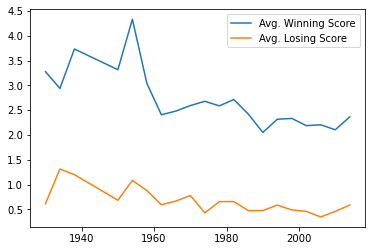

In [26]:
# Plot the winning and losing average scores for each world cup
plt.plot(winning_means_by_cup)
plt.plot(losing_means_by_cup)
plt.legend(['Avg. Winning Score','Avg. Losing Score'])

In [ ]:
# Group by country+cities

In [ ]:
# Attendance groups+graph

In [ ]:
# Most appearances for team?
# Most group advances?

In [ ]:
# Most common matchups?

In [ ]:
# Who has USA played the most?

In [ ]:
# Most goals? Most avg goals?

In [ ]:
# Most halftime comebacks?

In [55]:
# Find teams who won after being down at halftime
comeback_wins = matches.loc[matches['winning_score_half1']<matches['losing_score_half1']]

comeback_teams = comeback_wins.groupby('winner')['matchID'].count()
comeback_teams = comeback_teams.sort_values(ascending=False)

In [63]:
comeback_teams.count()

22

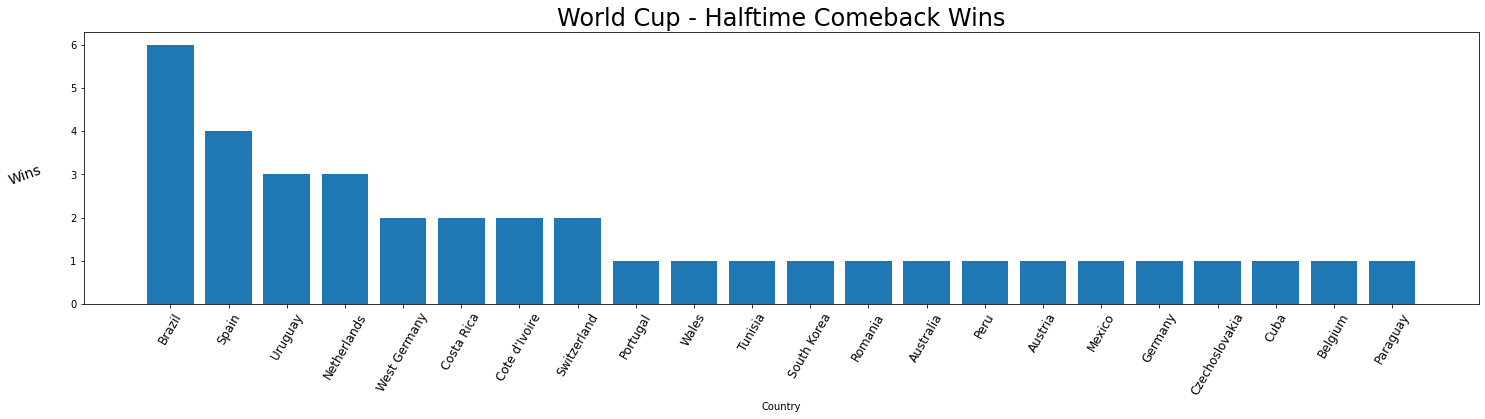

In [86]:
fig,ax = plt.subplots(figsize=(25,5))
ax.bar(comeback_teams.index,comeback_teams)

ax.set_title('World Cup - Halftime Comeback Wins', fontsize=24)
ax.set_xticks(np.arange(0,22,step=1))
ax.set_xticklabels(labels=comeback_teams.index,rotation=60, fontsize=12)
ax.set_xlabel('Country')
ax.set_yticks(ticks=np.arange(0,7,step=1),fontsize=12)
ax.set_ylabel('Wins', rotation=20, fontsize=14)
ax.yaxis.set_label_coords(-0.04,.45)

In [88]:
comebacks_by_year = comeback_wins.groupby('year')['matchID'].count()

C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


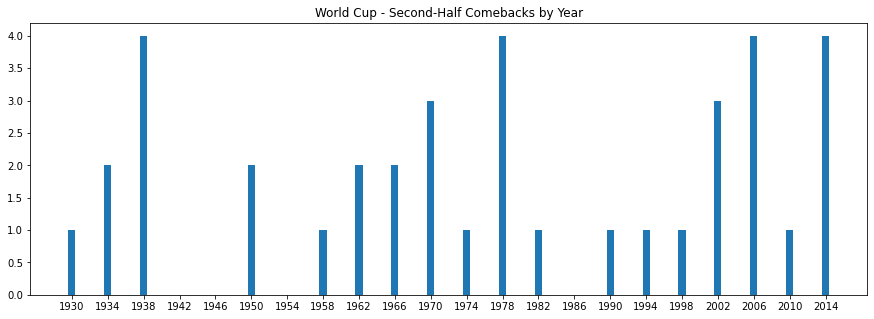

In [108]:
fig, ax = plt.subplots(figsize=(15,5))

ax.bar(comebacks_by_year.index, comebacks_by_year)
# Specify from 1930-2018 so it also shows years with no second-half comebacks
ax.set_xticks(np.arange(1930,2018, step=4))
ax.set_title('World Cup - Second-Half Comebacks by Year')

fig.show()

In [102]:
comebacks_by_host_country = comeback_wins.groupby('country')['matchID'].count()
comebacks_by_host_country = comebacks_by_host_country.sort_values(ascending=False)

C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


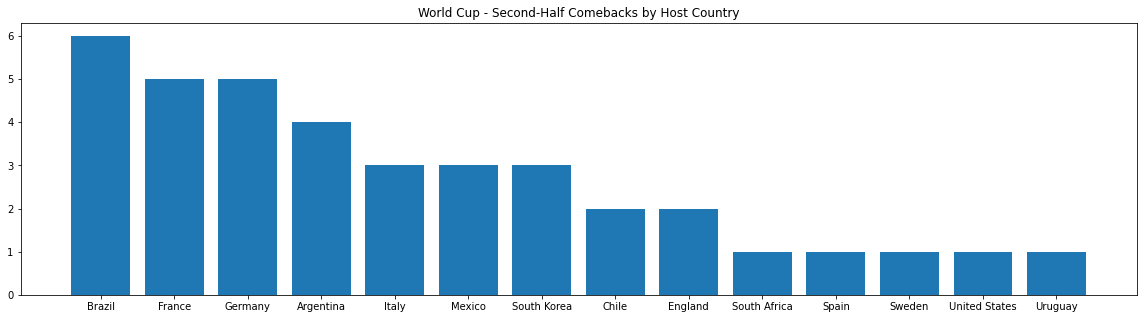

In [111]:
fig, ax = plt.subplots(figsize=(20,5))

ax.bar(comebacks_by_host_country.index, comebacks_by_host_country)
ax.set_title('World Cup - Second-Half Comebacks by Host Country')

fig.show()

In [116]:
comeback_wins['score_diff_half'] = comeback_wins['losing_score_half1'] - comeback_wins['winning_score_half1']
comeback_wins['score_diff_final'] = comeback_wins['winning_score_final'] - comeback_wins['losing_score_final']
comeback_wins['winning_score_half2'] = comeback_wins['winning_score_final'] - comeback_wins['winning_score_half1']
comeback_wins['losing_score_half2'] = comeback_wins['losing_score_final'] - comeback_wins['losing_score_half1']

C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,matchID,roundID,match_date,year,country,city,stadium,attendance,stage,home_name,...,away_score_final,winner,winning_score_half1,losing_score_half1,winning_score_final,losing_score_final,score_diff_half,score_diff_final,winning_score_half2,losing_score_half2
17,1087,405,1930-07-30,1930,Uruguay,Montevideo,Estadio Centenario,68346.00,Final,Uruguay,...,2,Uruguay,1.00,2.00,4.00,2.00,1.00,2.00,3.00,0.00
22,1108,204,1934-05-27,1934,Italy,Florence,Giovanni Berta,8000.00,Round of 16,Germany,...,2,Germany,1.00,2.00,5.00,2.00,1.00,3.00,4.00,0.00
25,1141,204,1934-05-27,1934,Italy,Trieste,Littorio,9000.00,Round of 16,Czechoslovakia,...,1,Czechoslovakia,0.00,1.00,2.00,1.00,1.00,1.00,2.00,0.00
42,1157,206,1938-06-09,1938,France,Toulouse,Stade Municipal,8000.00,Round of 16,Cuba,...,1,Cuba,0.00,1.00,2.00,1.00,1.00,1.00,2.00,0.00
43,1166,206,1938-06-09,1938,France,Paris,Parc des Princes,20025.00,Round of 16,Switzerland,...,2,Switzerland,1.00,2.00,4.00,2.00,1.00,2.00,3.00,0.00
48,1153,429,1938-06-14,1938,France,Bordeaux,Stade du Parc Lescure,18141.00,Quarterfinals,Brazil,...,1,Brazil,0.00,1.00,2.00,1.00,1.00,1.00,2.00,0.00
51,1151,3488,1938-06-19,1938,France,Bordeaux,Stade du Parc Lescure,12000.00,Third place,Brazil,...,2,Brazil,1.00,2.00,4.00,2.00,1.00,2.00,3.00,0.00
55,1208,208,1950-06-25,1950,Brazil,Curitiba,Durival de Brito,9511.00,Group 2,Spain,...,1,Spain,0.00,1.00,3.00,1.00,1.00,2.00,3.00,0.00
72,1231,209,1950-07-13,1950,Brazil,São Paulo,Pacaembu,7987.00,Final Round,Uruguay,...,2,Uruguay,1.00,2.00,3.00,2.00,1.00,1.00,2.00,0.00
127,1408,220,1958-06-17,1958,Sweden,Solna,Rasunda Stadium,2823.00,Group 3,Wales,...,1,Wales,0.00,1.00,2.00,1.00,1.00,1.00,2.00,0.00


In [205]:
losing_score_half2_group = comeback_wins.groupby('losing_score_half2')['matchID'].count()
losing_score_half1_group = comeback_wins.groupby('losing_score_half1')['matchID'].count()

C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


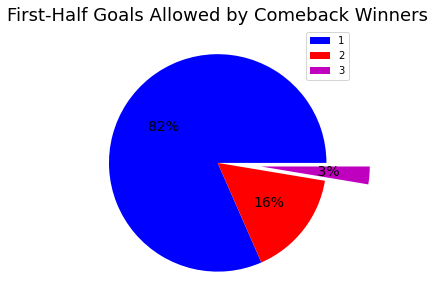

In [215]:
fig,ax = plt.subplots(figsize=(20,5))

labels = losing_score_half1_group.index
labels_adj = []

for i in range(len(labels)):
    labels_adj.append(int(labels[i]))
    
ax.set_title('First-Half Goals Allowed by Comeback Winners', fontsize=18)
ax.pie(losing_score_half1_group, autopct='%2.0f%%', 
       colors=['b','r','m'], explode=[0,0,0.4],
      textprops={'fontsize': 14})
ax.legend(labels_adj)
fig.show()

C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


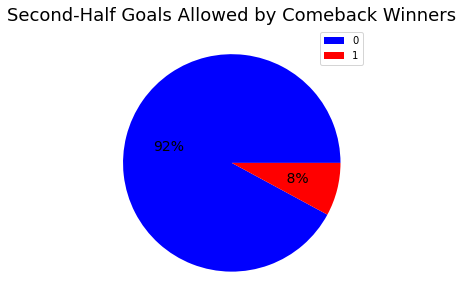

In [200]:
fig,ax = plt.subplots(figsize=(20,5))

labels = losing_score_half2_group.index
labels_adj = []

for i in range(len(labels)):
    labels_adj.append(int(labels[i]))
    
ax.set_title('Second-Half Goals Allowed by Comeback Winners', fontsize=18)
ax.pie(losing_score_half2_group, autopct='%2.0f%%', colors=['b','r'],
      textprops={'fontsize': 14})
ax.legend(labels_adj)
fig.show()